# Innovation Dataset - Data Exploration and Visualization

**Goal:** Understand the dataset through visualizations BEFORE doing any machine learning.

**Dataset:** 2,000 technology innovations from 2020-2024

This notebook helps you:
- See what the data looks like
- Understand success patterns
- Identify key features
- Build intuition for ML modeling

## Setup: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Function Definitions

All visualization and analysis functions are defined here for clean, reusable code.

In [2]:
def load_and_overview(filepath='innovations.csv'):
    """Load dataset and display basic overview information."""
    df = pd.read_csv(filepath)
    
    print(f"Dataset Shape: {df.shape}")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print(f"\nColumn Names:\n{list(df.columns)}")
    
    print("\n" + "="*60)
    print("First 5 rows:")
    print("="*60)
    display(df.head())
    
    print("\n" + "="*60)
    print("Data Types and Missing Values:")
    print("="*60)
    print(df.info())
    
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("\n✓ No missing values in dataset!")
    else:
        print(f"\nMissing values:\n{missing[missing > 0]}")
    
    print("\n" + "="*60)
    print("Statistical Summary:")
    print("="*60)
    display(df.describe())
    
    return df


def plot_success_rate_analysis(df):
    """Plot success rate distribution and trends by year."""
    success_rate = df['success'].mean()
    success_count = df['success'].sum()
    failed_count = len(df) - success_count
    
    print(f"Success Rate: {success_rate:.1%}")
    print(f"Successful: {success_count}")
    print(f"Failed: {failed_count}")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Pie chart of success
    ax1.pie([failed_count, success_count], 
            labels=['Failed', 'Successful'],
            autopct='%1.1f%%',
            colors=['#ff6b6b', '#51cf66'],
            startangle=90)
    ax1.set_title('Innovation Success Rate', fontsize=14, fontweight='bold')
    
    # Bar chart by year
    success_by_year = df.groupby('innovation_year')['success'].agg(['sum', 'count'])
    success_by_year.plot(kind='bar', ax=ax2, color=['#51cf66', '#4dabf7'])
    ax2.set_title('Innovations by Year', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Count')
    ax2.legend(['Successful', 'Total'])
    ax2.tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    return success_rate


def plot_categorical_distributions(df):
    """Plot distribution of categorical features in 2x2 grid."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Innovation Categories
    category_counts = df['innovation_category'].value_counts()
    axes[0, 0].barh(category_counts.index, category_counts.values, color='skyblue')
    axes[0, 0].set_xlabel('Count')
    axes[0, 0].set_title('Innovation Categories', fontweight='bold')
    
    # Company Types
    company_type_counts = df['company_type'].value_counts()
    axes[0, 1].bar(company_type_counts.index, company_type_counts.values, color=['coral', 'lightgreen'])
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_title('Company Types', fontweight='bold')
    
    # Development Stages
    stage_counts = df['development_stage'].value_counts()
    axes[1, 0].bar(range(len(stage_counts)), stage_counts.values, color='mediumpurple')
    axes[1, 0].set_xticks(range(len(stage_counts)))
    axes[1, 0].set_xticklabels(stage_counts.index, rotation=45, ha='right')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Development Stages', fontweight='bold')
    
    # Competition Levels
    competition_counts = df['competition_level'].value_counts()
    colors_comp = {'Low': '#51cf66', 'Medium': '#ffd43b', 'High': '#ff6b6b'}
    bars = axes[1, 1].bar(competition_counts.index, competition_counts.values)
    for bar, level in zip(bars, competition_counts.index):
        bar.set_color(colors_comp[level])
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('Competition Levels', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


def plot_numerical_distributions(df):
    """Plot histograms of numerical features in 2x3 grid."""
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    
    # Company Age
    axes[0, 0].hist(df['company_age_years'], bins=20, color='skyblue', edgecolor='black')
    axes[0, 0].set_xlabel('Years')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_title('Company Age Distribution', fontweight='bold')
    
    # Team Size
    axes[0, 1].hist(df['team_size'], bins=20, color='lightcoral', edgecolor='black')
    axes[0, 1].set_xlabel('Team Members')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_title('Team Size Distribution', fontweight='bold')
    
    # Team Experience
    axes[0, 2].hist(df['team_experience_avg_years'], bins=20, color='lightgreen', edgecolor='black')
    axes[0, 2].set_xlabel('Years')
    axes[0, 2].set_ylabel('Count')
    axes[0, 2].set_title('Team Experience Distribution', fontweight='bold')
    
    # Funding Raised
    axes[1, 0].hist(df['funding_raised_usd']/1e6, bins=30, color='gold', edgecolor='black')
    axes[1, 0].set_xlabel('Funding (Millions USD)')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Funding Distribution', fontweight='bold')
    
    # Market Size
    axes[1, 1].hist(df['market_size_millions'], bins=30, color='mediumpurple', edgecolor='black')
    axes[1, 1].set_xlabel('Market Size (Millions)')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('Target Market Size Distribution', fontweight='bold')
    
    # Market Growth Rate
    axes[1, 2].hist(df['market_growth_rate']*100, bins=20, color='salmon', edgecolor='black')
    axes[1, 2].set_xlabel('Growth Rate (%)')
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].set_title('Market Growth Rate Distribution', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


def plot_success_by_category(df, success_rate):
    """Plot success rates across different categorical dimensions."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Success rate by innovation category
    success_by_category = df.groupby('innovation_category')['success'].mean().sort_values(ascending=False)
    axes[0, 0].barh(success_by_category.index, success_by_category.values*100, color='steelblue')
    axes[0, 0].set_xlabel('Success Rate (%)')
    axes[0, 0].set_title('Success Rate by Innovation Category', fontweight='bold')
    axes[0, 0].axvline(x=success_rate*100, color='red', linestyle='--', label=f'Overall: {success_rate:.1%}')
    axes[0, 0].legend()
    
    # Success rate by company type
    success_by_company = df.groupby('company_type')['success'].mean()
    axes[0, 1].bar(success_by_company.index, success_by_company.values*100, color=['coral', 'lightgreen'])
    axes[0, 1].set_ylabel('Success Rate (%)')
    axes[0, 1].set_title('Success Rate by Company Type', fontweight='bold')
    axes[0, 1].axhline(y=success_rate*100, color='red', linestyle='--', label=f'Overall: {success_rate:.1%}')
    axes[0, 1].legend()
    
    # Success rate by development stage
    success_by_stage = df.groupby('development_stage')['success'].mean().sort_values(ascending=False)
    axes[1, 0].bar(range(len(success_by_stage)), success_by_stage.values*100, color='mediumpurple')
    axes[1, 0].set_xticks(range(len(success_by_stage)))
    axes[1, 0].set_xticklabels(success_by_stage.index, rotation=45, ha='right')
    axes[1, 0].set_ylabel('Success Rate (%)')
    axes[1, 0].set_title('Success Rate by Development Stage', fontweight='bold')
    axes[1, 0].axhline(y=success_rate*100, color='red', linestyle='--', label=f'Overall: {success_rate:.1%}')
    axes[1, 0].legend()
    
    # Success rate by competition level
    success_by_comp = df.groupby('competition_level')['success'].mean()
    success_by_comp = success_by_comp.reindex(['Low', 'Medium', 'High'])
    bars = axes[1, 1].bar(success_by_comp.index, success_by_comp.values*100)
    colors_comp = {'Low': '#51cf66', 'Medium': '#ffd43b', 'High': '#ff6b6b'}
    for bar, level in zip(bars, success_by_comp.index):
        bar.set_color(colors_comp[level])
    axes[1, 1].set_ylabel('Success Rate (%)')
    axes[1, 1].set_title('Success Rate by Competition Level', fontweight='bold')
    axes[1, 1].axhline(y=success_rate*100, color='red', linestyle='--', label=f'Overall: {success_rate:.1%}')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return success_by_stage


def plot_funding_market_analysis(df):
    """Plot scatter plots showing relationships between funding, market, and success."""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    colors = df['success'].map({0: 'red', 1: 'green'})
    
    # Funding vs Market Size
    axes[0].scatter(df['funding_raised_usd']/1e6, df['market_size_millions'], 
                   c=colors, alpha=0.5, s=30)
    axes[0].set_xlabel('Funding Raised (Millions USD)')
    axes[0].set_ylabel('Market Size (Millions)')
    axes[0].set_title('Funding vs Market Size', fontweight='bold')
    axes[0].legend(['Failed', 'Success'], loc='upper right')
    
    # Company Age vs Team Size
    axes[1].scatter(df['company_age_years'], df['team_size'], 
                   c=colors, alpha=0.5, s=30)
    axes[1].set_xlabel('Company Age (Years)')
    axes[1].set_ylabel('Team Size')
    axes[1].set_title('Company Age vs Team Size', fontweight='bold')
    
    # Market Growth vs Impact Score
    axes[2].scatter(df['market_growth_rate']*100, df['impact_score'], 
                   c=colors, alpha=0.5, s=30)
    axes[2].set_xlabel('Market Growth Rate (%)')
    axes[2].set_ylabel('Impact Score (1-10)')
    axes[2].set_title('Market Growth vs Impact Score', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


def plot_correlation_heatmap(df):
    """Plot correlation heatmap for numerical features."""
    numerical_cols = ['company_age_years', 'team_size', 'team_experience_avg_years',
                      'has_prior_success', 'funding_raised_usd', 'market_size_millions',
                      'market_growth_rate', 'success', 'impact_score']
    
    corr_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\nCorrelations with Success (sorted):")
    success_corr = corr_matrix['success'].sort_values(ascending=False)
    print(success_corr)
    
    return corr_matrix


def plot_success_comparison_boxplots(df):
    """Plot box plots comparing successful vs failed innovations."""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    successful = df[df['success'] == 1]
    failed = df[df['success'] == 0]
    
    # Funding comparison
    data_funding = [failed['funding_raised_usd']/1e6, successful['funding_raised_usd']/1e6]
    axes[0, 0].boxplot(data_funding, labels=['Failed', 'Successful'])
    axes[0, 0].set_ylabel('Funding (Millions USD)')
    axes[0, 0].set_title('Funding Distribution by Success', fontweight='bold')
    
    # Team Size comparison
    data_team = [failed['team_size'], successful['team_size']]
    axes[0, 1].boxplot(data_team, labels=['Failed', 'Successful'])
    axes[0, 1].set_ylabel('Team Size')
    axes[0, 1].set_title('Team Size by Success', fontweight='bold')
    
    # Company Age comparison
    data_age = [failed['company_age_years'], successful['company_age_years']]
    axes[1, 0].boxplot(data_age, labels=['Failed', 'Successful'])
    axes[1, 0].set_ylabel('Company Age (Years)')
    axes[1, 0].set_title('Company Age by Success', fontweight='bold')
    
    # Market Size comparison
    data_market = [failed['market_size_millions'], successful['market_size_millions']]
    axes[1, 1].boxplot(data_market, labels=['Failed', 'Successful'])
    axes[1, 1].set_ylabel('Market Size (Millions)')
    axes[1, 1].set_title('Market Size by Success', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nAverage Values Comparison:")
    print(f"\nFunding (Millions USD):")
    print(f"  Failed: ${failed['funding_raised_usd'].mean()/1e6:.2f}M")
    print(f"  Successful: ${successful['funding_raised_usd'].mean()/1e6:.2f}M")
    
    print(f"\nTeam Size:")
    print(f"  Failed: {failed['team_size'].mean():.1f}")
    print(f"  Successful: {successful['team_size'].mean():.1f}")
    
    print(f"\nCompany Age (Years):")
    print(f"  Failed: {failed['company_age_years'].mean():.1f}")
    print(f"  Successful: {successful['company_age_years'].mean():.1f}")
    
    return successful, failed


def plot_timeline_analysis(df, success_rate):
    """Plot innovation trends over time."""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Innovations over time
    innovations_by_year = df['innovation_year'].value_counts().sort_index()
    axes[0].plot(innovations_by_year.index, innovations_by_year.values, 
                marker='o', linewidth=2, markersize=8, color='steelblue')
    axes[0].fill_between(innovations_by_year.index, innovations_by_year.values, alpha=0.3)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number of Innovations')
    axes[0].set_title('Innovations Over Time', fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Success rate trend
    success_rate_by_year = df.groupby('innovation_year')['success'].mean()
    axes[1].plot(success_rate_by_year.index, success_rate_by_year.values*100, 
                marker='o', linewidth=2, markersize=8, color='green')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Success Rate (%)')
    axes[1].set_title('Success Rate Trend Over Time', fontweight='bold')
    axes[1].axhline(y=success_rate*100, color='red', linestyle='--', 
                   label=f'Overall: {success_rate:.1%}')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


def print_key_insights(df, success_rate, corr_matrix, success_by_stage, successful, failed):
    """Print comprehensive summary of key insights from the data."""
    success_count = df['success'].sum()
    failed_count = len(df) - success_count
    
    print("="*60)
    print("KEY INSIGHTS FROM DATA EXPLORATION")
    print("="*60)
    
    print(f"\n1. OVERALL SUCCESS RATE")
    print(f"   - {success_rate:.1%} of innovations succeed")
    print(f"   - {success_count} successful, {failed_count} failed")
    
    print(f"\n2. MOST COMMON INNOVATION CATEGORIES")
    top_categories = df['innovation_category'].value_counts().head(3)
    for i, (cat, count) in enumerate(top_categories.items(), 1):
        print(f"   {i}. {cat}: {count} innovations")
    
    print(f"\n3. SUCCESS BY COMPANY TYPE")
    for comp_type in df['company_type'].unique():
        rate = df[df['company_type'] == comp_type]['success'].mean()
        print(f"   - {comp_type}: {rate:.1%} success rate")
    
    print(f"\n4. SUCCESS BY COMPETITION LEVEL")
    for comp_level in ['Low', 'Medium', 'High']:
        rate = df[df['competition_level'] == comp_level]['success'].mean()
        print(f"   - {comp_level} competition: {rate:.1%} success rate")
    
    print(f"\n5. FUNDING PATTERNS")
    print(f"   - Average funding (all): ${df['funding_raised_usd'].mean()/1e6:.2f}M")
    print(f"   - Average funding (successful): ${successful['funding_raised_usd'].mean()/1e6:.2f}M")
    print(f"   - Average funding (failed): ${failed['funding_raised_usd'].mean()/1e6:.2f}M")
    
    print(f"\n6. TEAM CHARACTERISTICS")
    print(f"   - Average team size: {df['team_size'].mean():.1f} people")
    print(f"   - Average team experience: {df['team_experience_avg_years'].mean():.1f} years")
    print(f"   - Prior success rate: {df['has_prior_success'].mean():.1%}")
    
    print(f"\n7. STRONGEST CORRELATIONS WITH SUCCESS")
    top_corr = corr_matrix['success'].drop('success').abs().sort_values(ascending=False).head(3)
    for feature, corr in top_corr.items():
        direction = "positive" if corr_matrix.loc[feature, 'success'] > 0 else "negative"
        print(f"   - {feature}: {corr:.3f} ({direction})")
    
    print(f"\n8. DEVELOPMENT STAGE INSIGHTS")
    for stage in success_by_stage.index:
        rate = success_by_stage[stage]
        print(f"   - {stage}: {rate:.1%} success rate")
    
    print("\n" + "="*60)
    print("Ready for Machine Learning Analysis!")
    print("Next: Run 01_supervised_learning_analysis.ipynb")
    print("="*60)

---

# Main Analysis

Now we'll run all the analyses using the functions defined above.

## 1. Load Data and Overview

In [3]:
df = load_and_overview('innovations.csv')

Dataset Shape: (2000, 20)
Rows: 2000, Columns: 20

Column Names:
['innovation_id', 'innovation_year', 'innovation_title', 'innovation_description', 'company_name', 'company_type', 'company_age_years', 'team_size', 'team_experience_avg_years', 'has_prior_success', 'innovation_category', 'technology_type', 'development_stage', 'target_market', 'funding_raised_usd', 'market_size_millions', 'market_growth_rate', 'competition_level', 'success', 'impact_score']

First 5 rows:


,innovation_id,innovation_year,innovation_title,innovation_description,company_name,company_type,company_age_years,team_size,team_experience_avg_years,has_prior_success,innovation_category,technology_type,development_stage,target_market,funding_raised_usd,market_size_millions,market_growth_rate,competition_level,success,impact_score
0,INV_0001,2020,TechSystems unveils innovative mobility platform,Electric vehicle technology with 84% longer ra...,TechSystems,Startup,1,7,5,0,Mobility,Software,Prototype,B2B,250000,2807,0.08,Medium,0,4.7
1,INV_0002,2022,BrightSystems's healthtech solution achieves m...,This healthcare solution uses natural language...,BrightSystems,Startup,5,17,15,0,HealthTech,Service,Market-Ready,B2G,5000000,2237,0.26,High,0,3.8
2,INV_0003,2024,New agritech technology from InnovateSolutions...,Our platform monitors soil and crops in real-t...,InnovateSolutions,Startup,3,15,10,0,AgriTech,Software,MVP,B2B,2000000,2202,0.27,Medium,0,5.0
3,INV_0004,2023,ApexSolutions announces healthtech innovation ...,Revolutionary software platform for diabetes m...,ApexSolutions,Startup,4,18,4,1,HealthTech,Hardware,MVP,B2G,100000,2207,0.34,Low,1,9.8
4,INV_0005,2020,New agritech technology from NovaSolutions pro...,Our platform monitors soil and crops in real-t...,NovaSolutions,Startup,2,8,3,0,AgriTech,Platform,Prototype,B2B,1000000,1785,0.33,High,0,3.6



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   innovation_id              2000 non-null   object 
 1   innovation_year            2000 non-null   int64  
 2   innovation_title           2000 non-null   object 
 3   innovation_description     2000 non-null   object 
 4   company_name               2000 non-null   object 
 5   company_type               2000 non-null   object 
 6   company_age_years          2000 non-null   int64  
 7   team_size                  2000 non-null   int64  
 8   team_experience_avg_years  2000 non-null   int64  
 9   has_prior_success          2000 non-null   int64  
 10  innovation_category        2000 non-null   object 
 11  technology_type            2000 non-null   object 
 12  development_stage          2000 non-null   object 
 13  target_market   

,innovation_year,company_age_years,team_size,team_experience_avg_years,has_prior_success,funding_raised_usd,market_size_millions,market_growth_rate,success,impact_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,2021.980000,12.604000,61.593500,10.712000,0.396000,2.041435e+07,2535.763000,0.201495,0.584500,6.093250
std,1.414072,12.531189,60.003304,4.568861,0.489187,2.874349e+07,1453.283765,0.086735,0.492931,2.196841
min,2020.000000,0.000000,3.000000,3.000000,0.000000,1.000000e+05,51.000000,0.050000,0.000000,1.000000
25%,2021.000000,2.000000,14.000000,7.000000,0.000000,2.000000e+06,1271.750000,0.130000,0.000000,4.400000
50%,2022.000000,6.000000,25.000000,11.000000,0.000000,1.000000e+07,2524.000000,0.200000,1.000000,6.300000
75%,2023.000000,23.000000,109.000000,15.000000,1.000000,2.500000e+07,3806.250000,0.280000,1.000000,7.800000
max,2024.000000,40.000000,200.000000,18.000000,1.000000,1.000000e+08,5000.000000,0.350000,1.000000,10.000000


## 2. Success Rate Analysis

Success Rate: 58.5%
Successful: 1169
Failed: 831


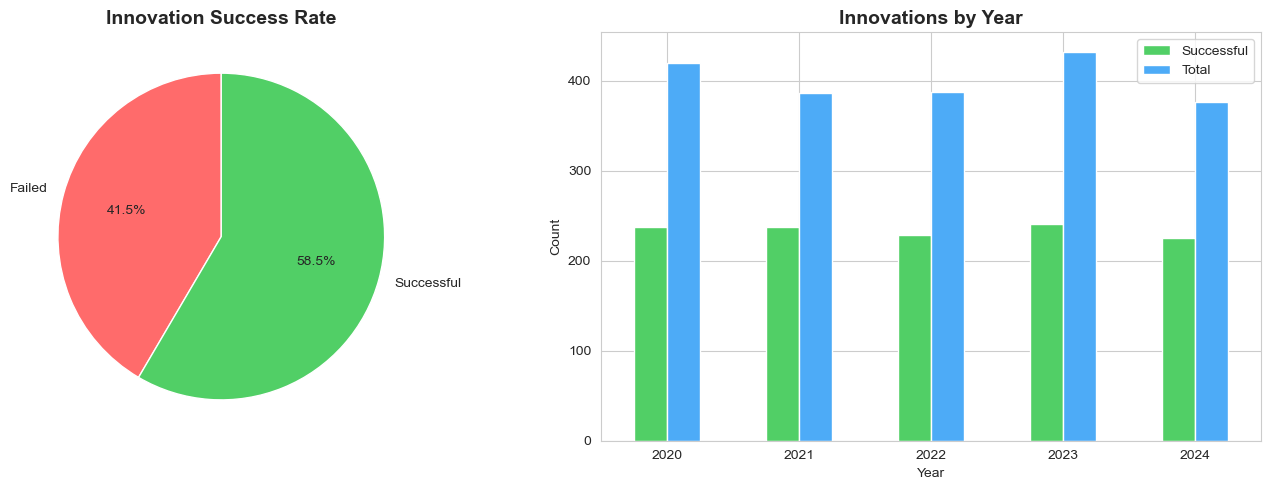

In [4]:
success_rate = plot_success_rate_analysis(df)

## 3. Categorical Features Distribution

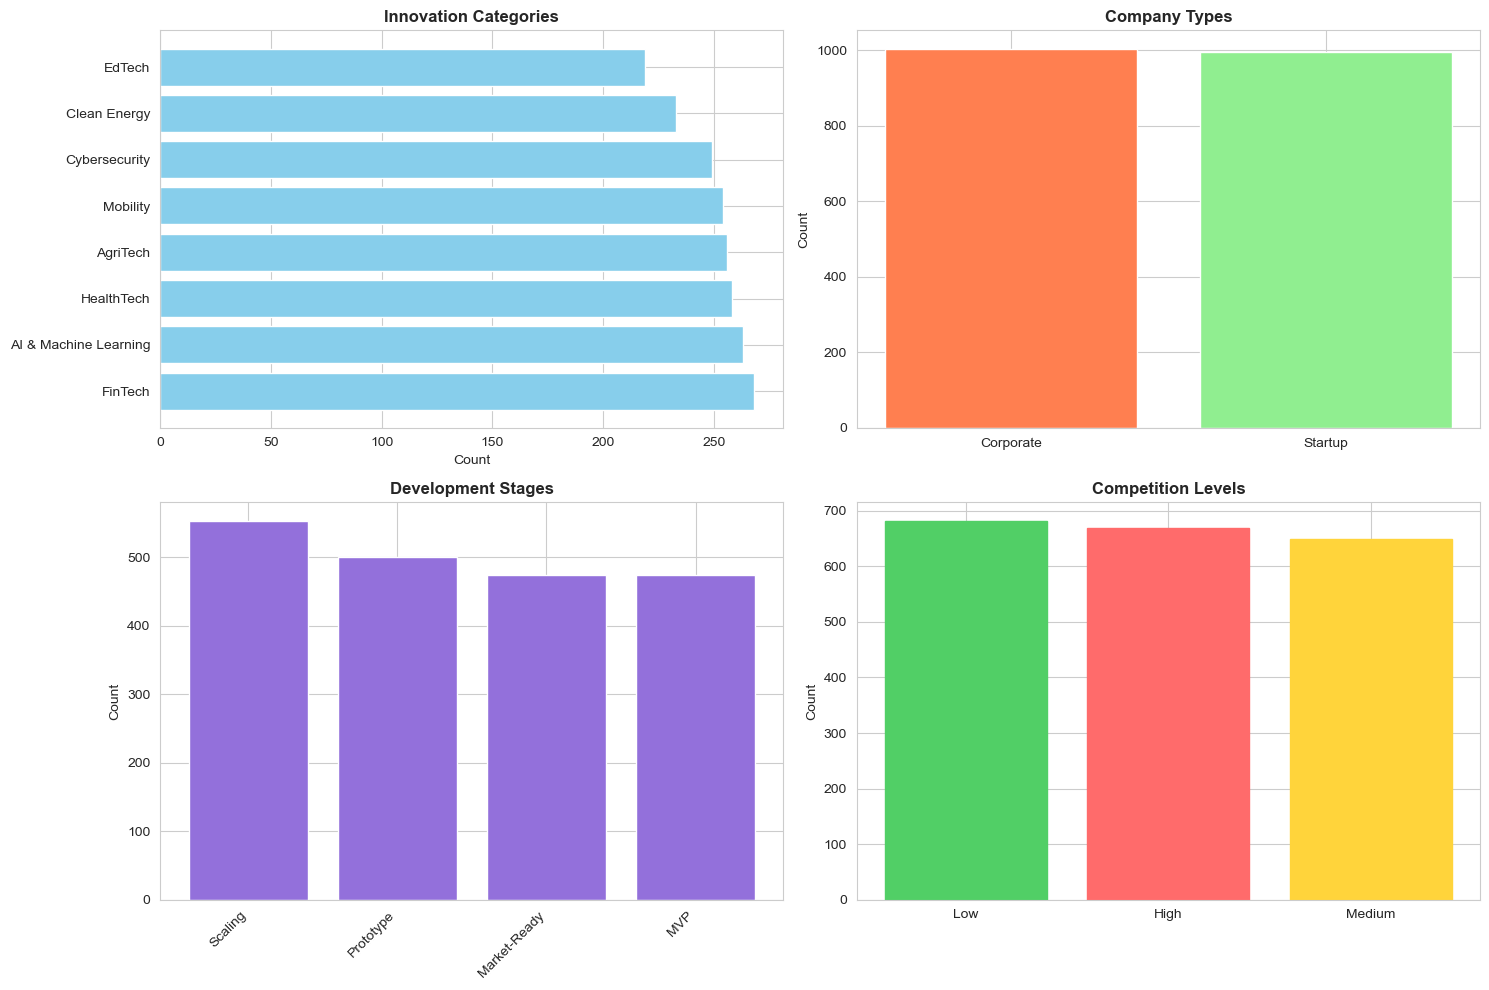

In [5]:
plot_categorical_distributions(df)

## 4. Numerical Features Distribution

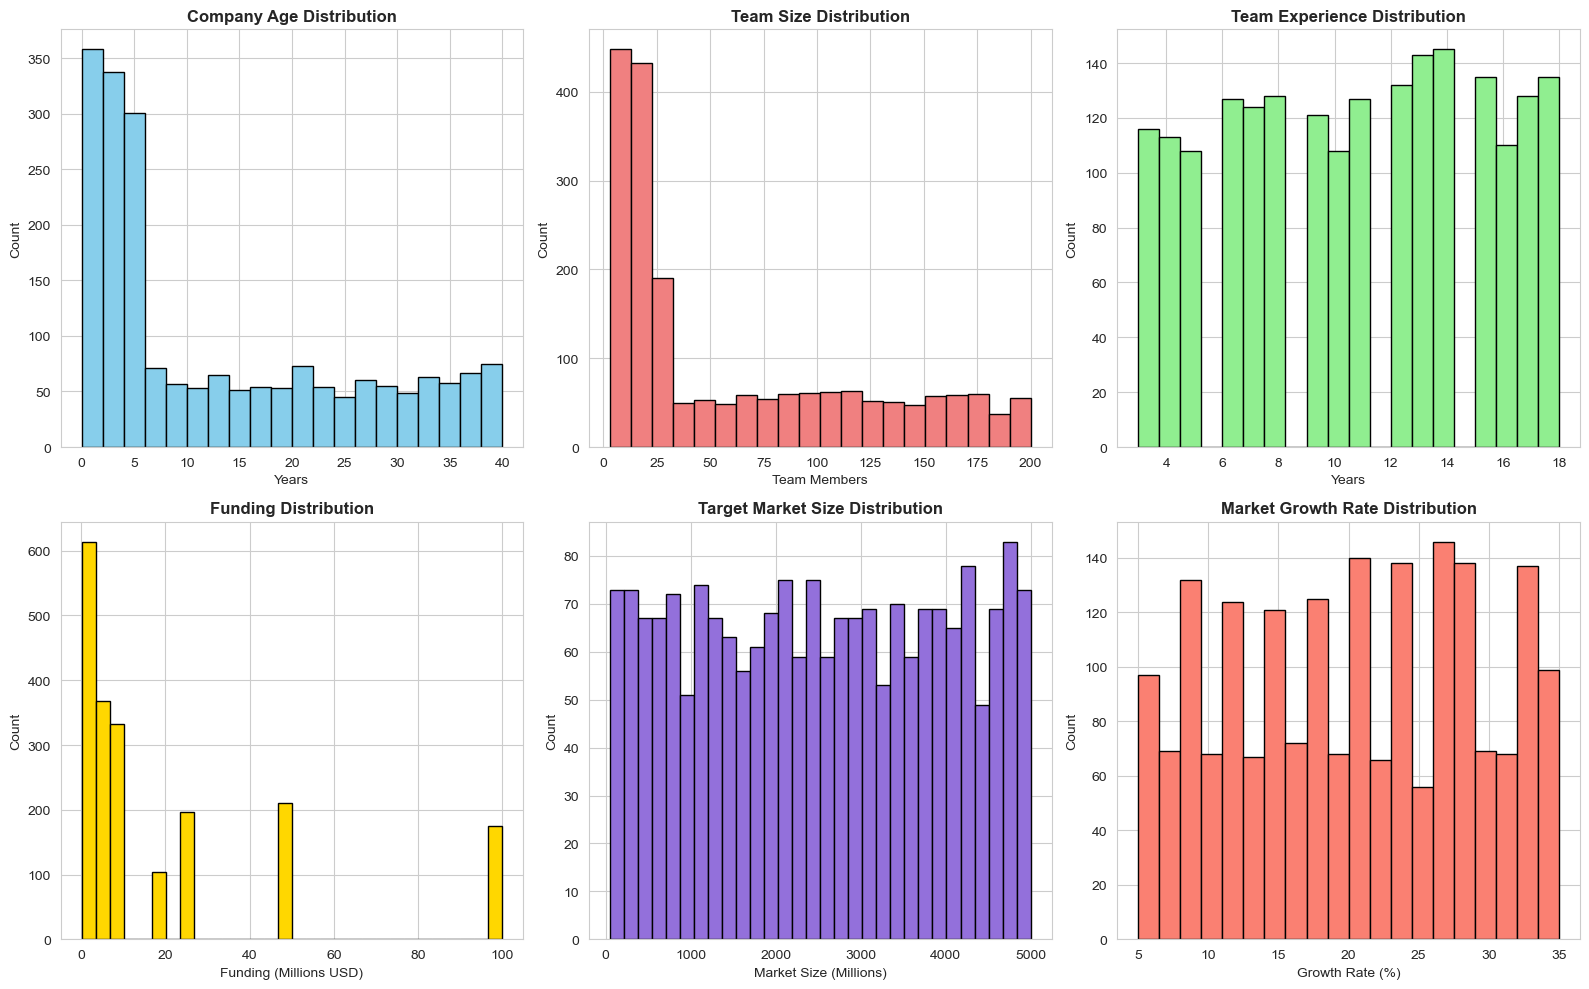

In [6]:
plot_numerical_distributions(df)

## 5. Success Rate by Category

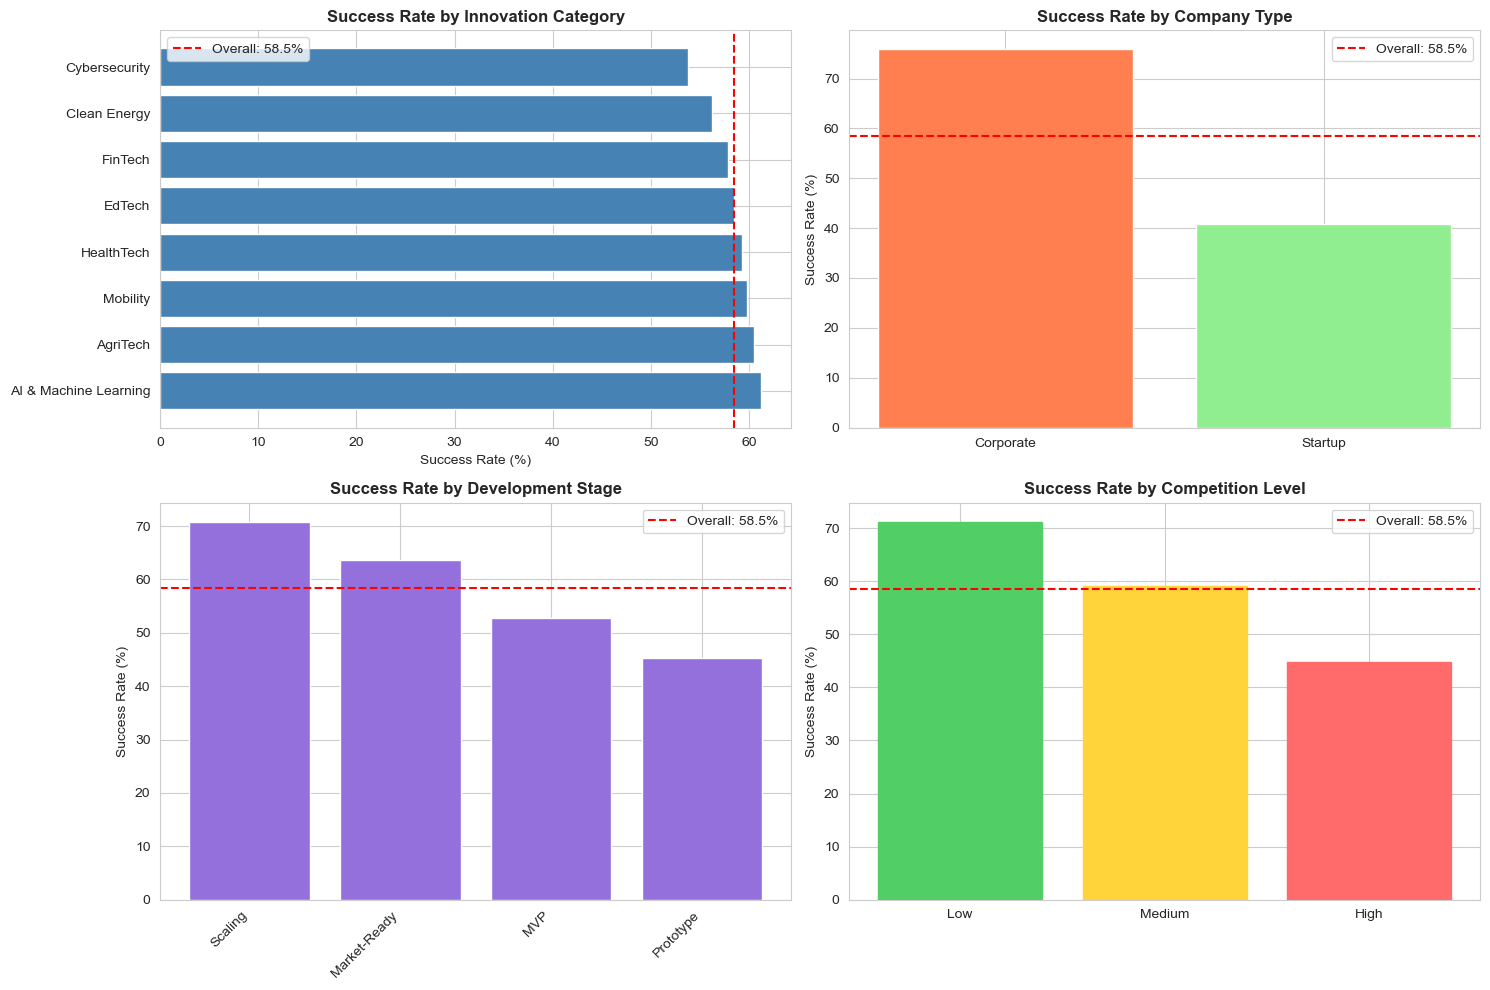

In [7]:
success_by_stage = plot_success_by_category(df, success_rate)

## 6. Funding and Market Analysis

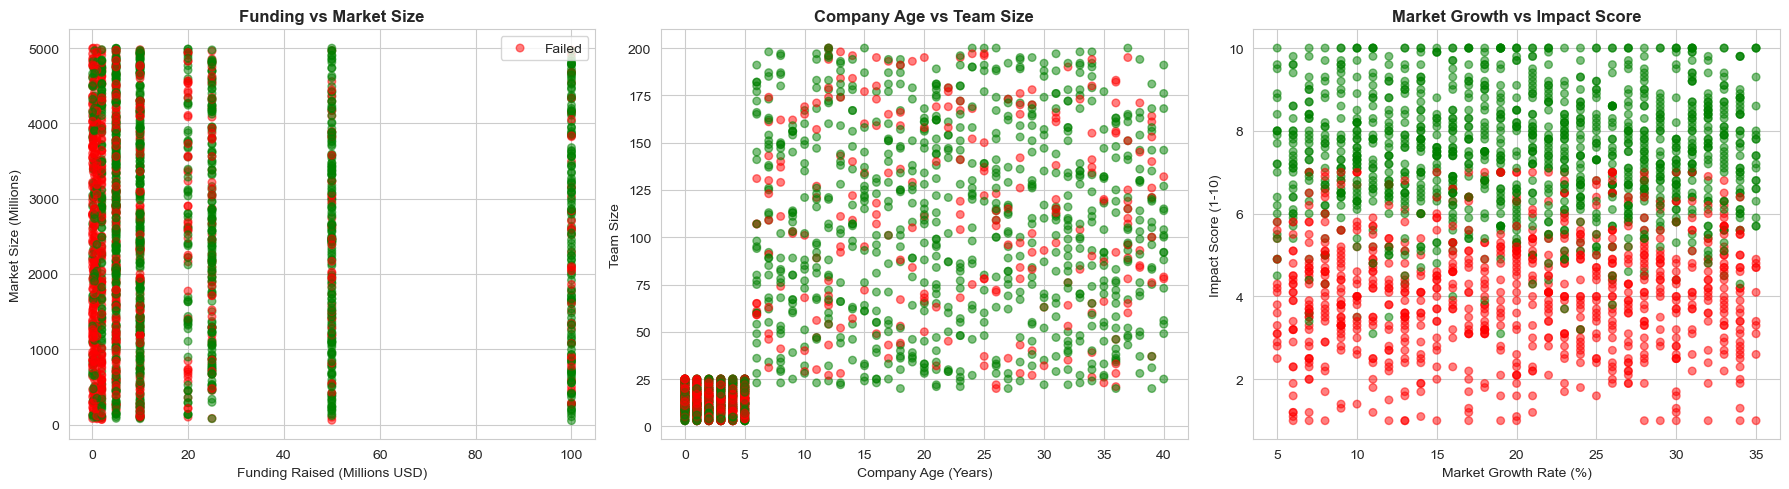

In [8]:
plot_funding_market_analysis(df)

## 7. Correlation Heatmap

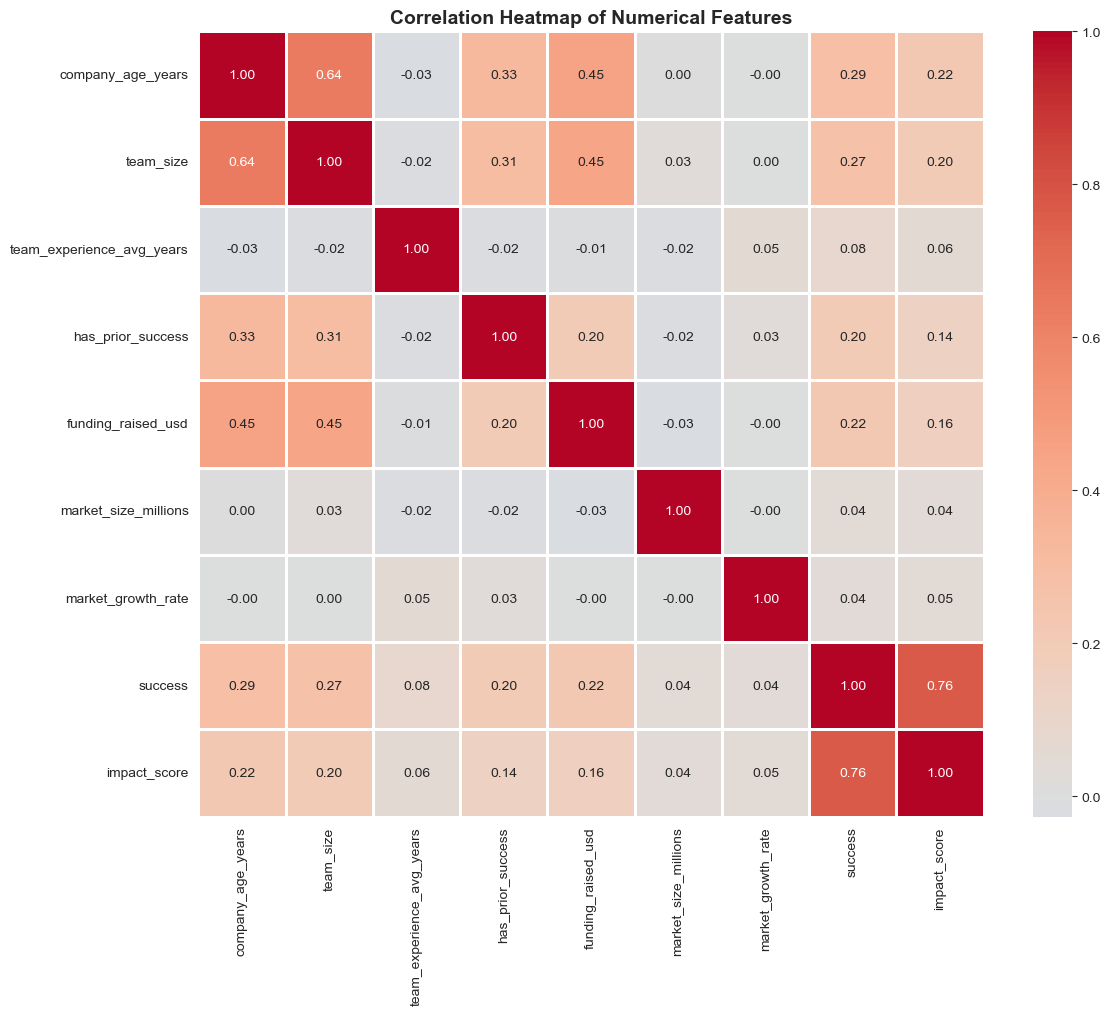


Correlations with Success (sorted):
success                      1.000000
impact_score                 0.763750
company_age_years            0.288060
team_size                    0.273913
funding_raised_usd           0.218483
has_prior_success            0.201390
team_experience_avg_years    0.084556
market_size_millions         0.043601
market_growth_rate           0.038639
Name: success, dtype: float64


In [9]:
corr_matrix = plot_correlation_heatmap(df)

## 8. Success vs Failure Comparison

C:\Users\OsterriederJRO\AppData\Local\Temp\ipykernel_19492\2211076955.py:260: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot(data_funding, labels=['Failed', 'Successful'])
C:\Users\OsterriederJRO\AppData\Local\Temp\ipykernel_19492\2211076955.py:266: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(data_team, labels=['Failed', 'Successful'])
C:\Users\OsterriederJRO\AppData\Local\Temp\ipykernel_19492\2211076955.py:272: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(data_age, labels=['Failed', 'Successful'])
C:\Users\OsterriederJRO\AppData\Local\Temp\ipykernel_19492\221

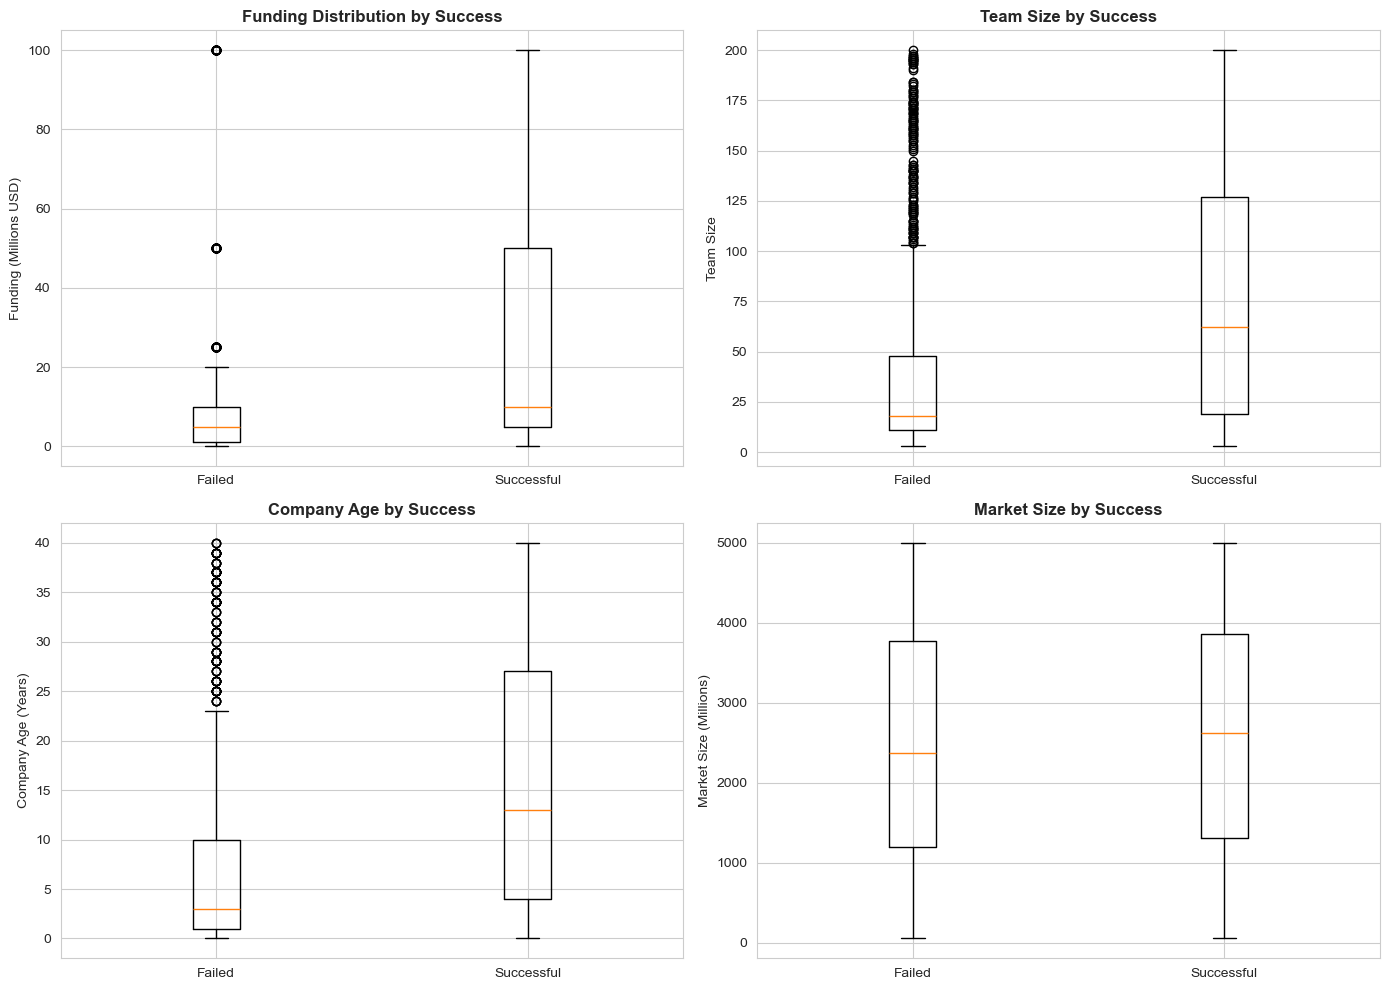


Average Values Comparison:

Funding (Millions USD):
  Failed: $12.97M
  Successful: $25.71M

Team Size:
  Failed: 42.1
  Successful: 75.4

Company Age (Years):
  Failed: 8.3
  Successful: 15.6


In [10]:
successful, failed = plot_success_comparison_boxplots(df)

## 9. Timeline Analysis

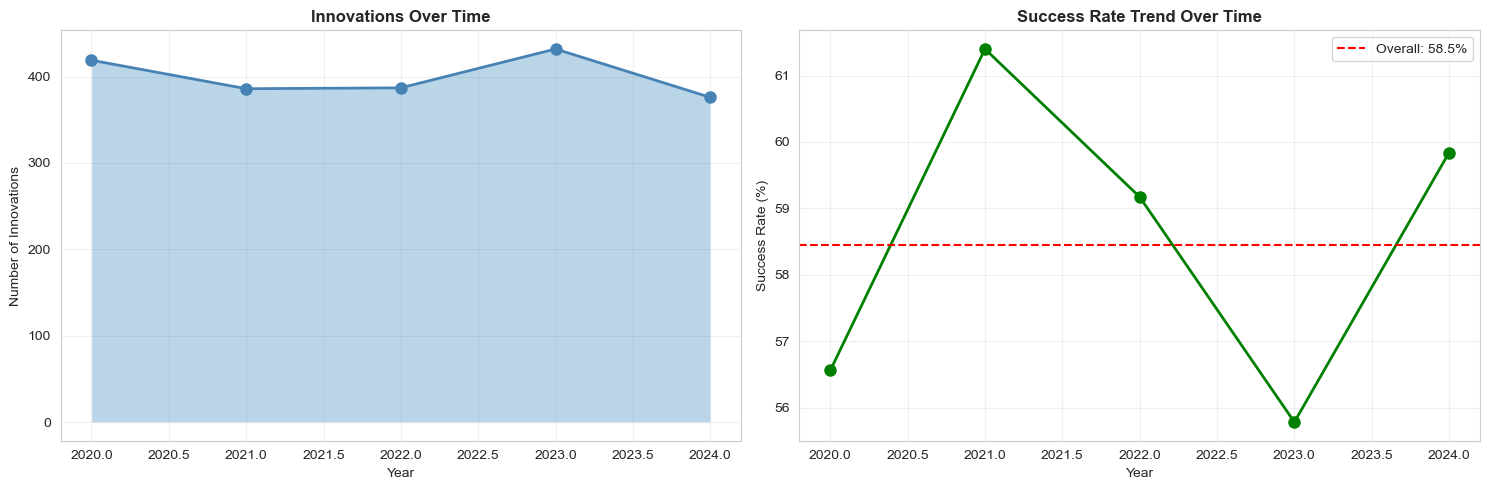

In [11]:
plot_timeline_analysis(df, success_rate)

## 10. Key Insights Summary

In [12]:
print_key_insights(df, success_rate, corr_matrix, success_by_stage, successful, failed)

KEY INSIGHTS FROM DATA EXPLORATION

1. OVERALL SUCCESS RATE
   - 58.5% of innovations succeed
   - 1169 successful, 831 failed

2. MOST COMMON INNOVATION CATEGORIES
   1. FinTech: 268 innovations
   2. AI & Machine Learning: 263 innovations
   3. HealthTech: 258 innovations

3. SUCCESS BY COMPANY TYPE
   - Startup: 40.9% success rate
   - Corporate: 75.9% success rate

4. SUCCESS BY COMPETITION LEVEL
   - Low competition: 71.2% success rate
   - Medium competition: 59.1% success rate
   - High competition: 44.8% success rate

5. FUNDING PATTERNS
   - Average funding (all): $20.41M
   - Average funding (successful): $25.71M
   - Average funding (failed): $12.97M

6. TEAM CHARACTERISTICS
   - Average team size: 61.6 people
   - Average team experience: 10.7 years
   - Prior success rate: 39.6%

7. STRONGEST CORRELATIONS WITH SUCCESS
   - impact_score: 0.764 (positive)
   - company_age_years: 0.288 (positive)
   - team_size: 0.274 (positive)

8. DEVELOPMENT STAGE INSIGHTS
   - Scaling: 70

---

## What We Learned

From this exploratory analysis, we now understand:

1. **Data Quality**: No missing values, 2,000 complete records
2. **Success Distribution**: ~58% success rate (realistic imbalance)
3. **Key Patterns**:
   - Corporate companies tend to succeed more than startups
   - Low competition increases success probability
   - Later development stages (Market-Ready, Scaling) perform better
   - Funding levels vary widely but successful innovations have higher average funding
4. **Feature Relationships**: Some numerical features correlate with success
5. **Category Differences**: Innovation categories have different success rates

**Next Steps:**
- Use these insights to guide feature engineering
- Train supervised learning models to predict success
- Try clustering to discover innovation archetypes
- Analyze text descriptions with NLP

See `README.md` for complete ML analysis examples!